 "Os movimentos das moléculas, principalmente em altas temperaturas, são caóticos e, portanto, existe a possibilidade de não atingir a energia mínima para essas temperaturas."
 
 -Stanisław Sieniutycz , Jacek Jeżowski , em Otimização de Energia em Sistemas de Processo e Células de Combustível (Terceira Edição) , 2018

In [1]:
from numpy.random import randint 
from matplotlib import pyplot as plt

class map:
    # defina um grande espaço se tiver n cidades
    def __init__(self,cidades,espaco):
        self.intervalo_a = round(espaco/2)
        self.intervalo_b = round(espaco)
        self.cidades = cidades
        self.x_cords = randint(low=0,       high=self.intervalo_a,      size = self.cidades)
        self.y_cords = randint(low=self.intervalo_a, high=self.intervalo_b, size = self.cidades)
        

    def show_map(self):
        fig = plt.figure(figsize=(4,4)) 
        ax1 = fig.add_subplot()
        plt.title('cidade original')
        ax1.plot(self.x_cords, self.y_cords,'b')
        ax1.plot(self.x_cords, self.y_cords,'.r')
        plt.xlabel("X",fontsize='13')	#adds a label in the x axis
        plt.ylabel("Y",fontsize='13')	#adds a label in the y axis
        plt.legend(('rota original'),loc='best')
        plt.grid()
        plt.show()
    
    def get_cities(self):
        cities = list()
        for i in range(self.x_cords.size):
            cities.append((self.x_cords[i],self.y_cords[i]))
        
        return cities

    


In [4]:
import math
import random
class Traveling_salesman():
    def __init__(self,cities):
        self.routes = []
        self.cities = cities
        self.start_point = ()

   
    def set_start_point(self):
        start_point = random.choice(self.cities)
        # ponto inicial não pode se repitir
        self.cities.remove(start_point)
        self.start_point = start_point
        
    def is_equal(self,p1,p2):
        return p1 == p2

    def evaluate_travel(self,atual,prox,initial):
        total = self.evaluate_point(atual,prox)
        total += self.evaluate_initial(atual, initial)
        return total
   
    #calcula: P(n) relação próximo ponto
    def evaluate_point(self,atual,prox):
        x_atual = atual[0] # x
        y_atual = atual[1] # y
        
        x_prox = prox[0]
        y_prox = prox[1]
    
        # relação ao próximo nó 
        cost = math.sqrt(abs(x_prox - x_atual)**2+ abs(y_prox - y_atual)**2)
        return cost
    
    #calcula: R_relação ao ponto inicial
    def evaluate_initial(self,atual,initial):
        x_atual = atual[0] # x
        y_atual = atual[1] # y

        x_initial = initial[0]
        y_initial = initial[1]

        
        cost =  math.sqrt(abs(x_initial - x_atual)**2+ abs(y_initial - y_atual)**2)
        return cost


In [14]:
import random
from numpy import asarray
from numpy.random import randn, rand, seed
# from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot

class SimulatedAnnealing():

    def __init__(self ,initialTemp,finalTemp, tempReduction, iterations, alpha=10, beta=0.05):
        self.solution = 0
        self.preset_val = 0 
        self.custo_lote = []
        self.neighbors = [[]]
        self.currTemp = initialTemp
        self.finalTemp = finalTemp
        self.iterations = iterations
        self.alpha = alpha
        self.beta = beta
        
        if tempReduction == "linear":
            self.decrementRule = self.linearTempReduction
        elif tempReduction == "geometric":
            self.decrementRule = self.geometricTempReduction
            
        elif tempReduction == "slowDecrease":
            self.decrementRule = self.slowDecreaseTempReduction
        # else:
        #     self.decrementRule = tempReduction

    def linearTempReduction(self):
        self.currTemp -= self.alpha

    def geometricTempReduction(self):
        self.currTemp *= self.alpha

    def slowDecreaseTempReduction(self):
        self.currTemp -= ((self.currTemp/self.beta)*0.2)+75
        

    def e_criterio_termino(self):
            # outros paramêtros podem ser adotados
        return self.currTemp <= self.finalTemp

    def run(self,mapa_class):
        
        j=0
        self.preset_val = random.choice(mapa_class.get_cities())
        salesman = Traveling_salesman(mapa_class.get_cities())

        salesman.set_start_point()
        ponto_inicial = salesman.start_point
            
        evaluate = salesman.evaluate_travel

        while not self.e_criterio_termino():
                #busca todos os vizinhos
                vizinhos = mapa_class.get_cities()
                # outputs = []
                best_result = []
                vizinhos = mapa_class.get_cities()
                
                self.custo_lote.append(0)
                
                # itera n vezes
                for i in range(self.iterations):
                        
                    #compare soluções aleatóriamente
                    solution_a = random.choice(vizinhos)
                    solution_b = random.choice(vizinhos)

                    # avaliar custos 
                    custo = evaluate(self.preset_val, solution_b, ponto_inicial) - evaluate(self.preset_val, solution_a, ponto_inicial)
                    # print(type(custo))
                    # se o custo for melhor, aceita-lo
                    if custo >= 0:
                        self.preset_val = solution_a
                        self.custo_lote[j] += custo
                        self.neighbors[j].append(self.preset_val)
                    #se a solução não for a melhor, aceite-a probabilisticamente
                    elif random.uniform(0,1) < math.exp(-custo / self.currTemp):
                        self.preset_val = solution_a
                        self.custo_lote[j] += abs(custo)
                        self.neighbors[j].append(self.preset_val)
                    else:
                        self.custo_lote[j] += abs(custo)
                        self.neighbors[j].append(solution_b)
                        self.preset_val = solution_b
                    # print (f'best cord: {self.preset_val} lote: {j} iterarion n° {i}' ) 
                    # remove este elemento para não o repetir
                    vizinhos.remove(self.preset_val)

                # print(f'temperatura atual {self.currTemp}')
                # decrement the temperature
                self.decrementRule()
                
                print( f'temperatura atual {self.currTemp} criterio de parada? {self.e_criterio_termino() }' )
                print( f'custo total do lote: {round(self.custo_lote[j],3) }' )

                # #próximo lote
                j+=1
                self.neighbors.append([])

                # best result
                if(self.e_criterio_termino()):
                    self.solution = min(self.custo_lote)
                    for i in range(len(self.custo_lote)):
                        if self.solution == self.custo_lote[i]:
                            best_result = self.neighbors[i]
                            break
                    return best_result,self.solution,salesman.start_point

In [15]:

# variaveis necessárioas

cities_total = 26
space = 1000
tem = 9000
mapa = map(cities_total,space)
sa = SimulatedAnnealing(initialTemp=tem, finalTemp=0, iterations=cities_total, tempReduction='slowDecrease',beta=4)


result,solution,start_point = sa.run(mapa)


temperatura atual 8475.0 criterio de parada? False
custo total do lote: 2806.607
temperatura atual 7976.25 criterio de parada? False
custo total do lote: 3116.41
temperatura atual 7502.4375 criterio de parada? False
custo total do lote: 2465.581
temperatura atual 7052.315625 criterio de parada? False
custo total do lote: 2161.772
temperatura atual 6624.699843750001 criterio de parada? False
custo total do lote: 1898.4
temperatura atual 6218.4648515625 criterio de parada? False
custo total do lote: 2519.947
temperatura atual 5832.541608984376 criterio de parada? False
custo total do lote: 2608.493
temperatura atual 5465.914528535157 criterio de parada? False
custo total do lote: 2910.121
temperatura atual 5117.618802108399 criterio de parada? False
custo total do lote: 2377.102
temperatura atual 4786.737862002979 criterio de parada? False
custo total do lote: 3207.763
temperatura atual 4472.400968902831 criterio de parada? False
custo total do lote: 2277.728
temperatura atual 4173.78092

In [16]:
print(result)
print( f'peso min -> {solution}' )
# print(viz)


[(2, 715), (172, 723), (364, 517), (95, 507), (126, 734), (455, 830), (134, 736), (230, 803), (487, 713), (254, 831), (262, 796), (222, 861), (153, 854), (58, 525), (295, 631), (73, 560), (104, 529), (10, 930), (335, 809), (197, 818), (442, 874), (19, 522), (398, 693), (138, 666), (464, 790), (129, 827)]
peso min -> 1898.3997887586565


In [22]:
x_values = []
y_values = []

for item in result:
    x , y  =  item
    x_values.append(x)
    y_values.append(y)

x_values.append(start_point[0])
y_values.append(start_point[1])


OBS: Melhor rota, segundo a heurística!

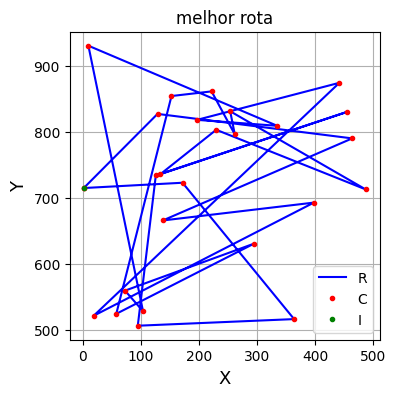

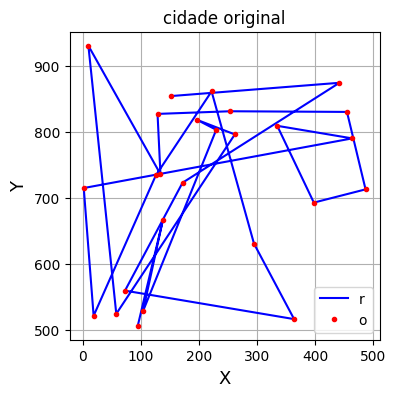

In [27]:
 
fig = plt.figure(figsize=(4,4)) 
ax1 = fig.add_subplot()
# melhor rota
ax1.plot(x_values,y_values,'b')
ax1.plot(x_values,y_values,'.r')
ax1.plot(start_point[0],start_point[1],'.g')
plt.title('melhor rota')
plt.xlabel("X",fontsize='13')	
plt.ylabel("Y",fontsize='13')
plt.legend(('RCI'),loc='best')
# plt.savefig('Y_X.png')	
plt.grid()	
plt.show()

#mapa original
mapa.show_map()